This code was written by Maria Garcia for CSE485 Skills Modules 😃

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
#Top songs on Spotify from 2009-2019, located using Kaggle
data = pd.read_csv('/songs_normalize.csv')
data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [ ]:
# Selecting relevant features for clustering
features = data[['acousticness', 'danceability', 'energy', 'instrumentalness', 'valence', 'liveness', 'loudness', 'speechiness', 'tempo']]

In [ ]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# Performing k-means clustering
k = 6  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [ ]:
# Adding cluster labels to the original data
data['cluster'] = kmeans.labels_

In [ ]:
# Analyzing cluster centers
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features.columns)
print(centers)

   acousticness  danceability    energy  instrumentalness   valence  liveness  \
0      0.407580      0.627867  0.491314          0.004518  0.379560  0.140159   
1      0.065198      0.621805  0.817419          0.003265  0.611083  0.460025   
2      0.065981      0.570372  0.753374          0.006685  0.378384  0.149522   
3      0.120821      0.733409  0.679922          0.001783  0.576818  0.159542   
4      0.130950      0.687774  0.730806          0.662710  0.511584  0.158313   
5      0.099662      0.751277  0.762198          0.005839  0.730461  0.131331   

   loudness  speechiness       tempo  
0 -8.036494     0.075747  111.014820  
1 -4.566411     0.098299  127.796295  
2 -5.151471     0.066606  127.849801  
3 -5.947323     0.291100  119.267517  
4 -6.867355     0.068887  123.820323  
5 -4.939623     0.071892  114.665045  


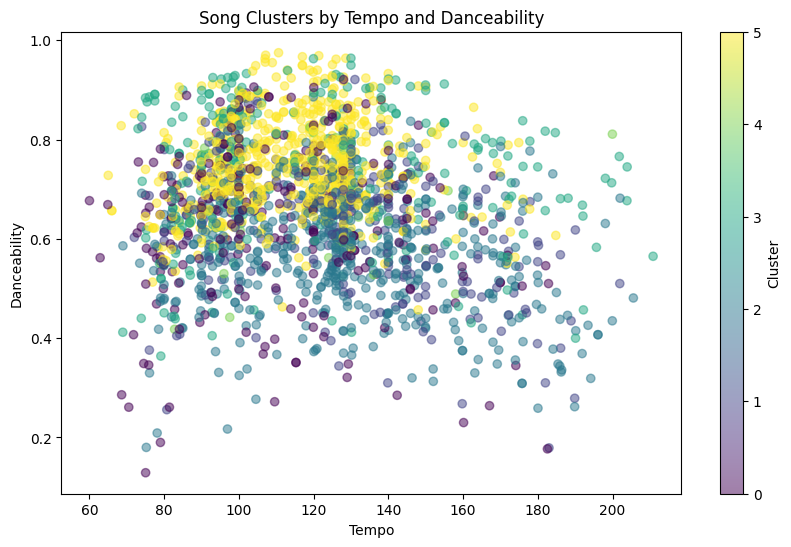

In [ ]:
# Plotting clusters (example using two features: 'energy' and 'danceability')
plt.figure(figsize=(10, 6))
plt.scatter(data['tempo'], data['danceability'], c=data['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Tempo')
plt.ylabel('Danceability')
plt.title('Song Clusters by Tempo and Danceability')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

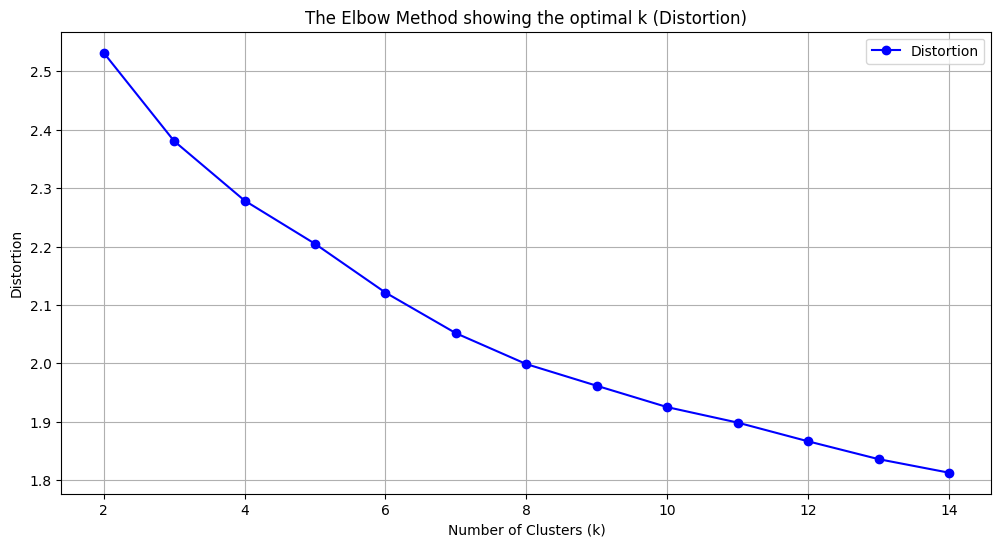

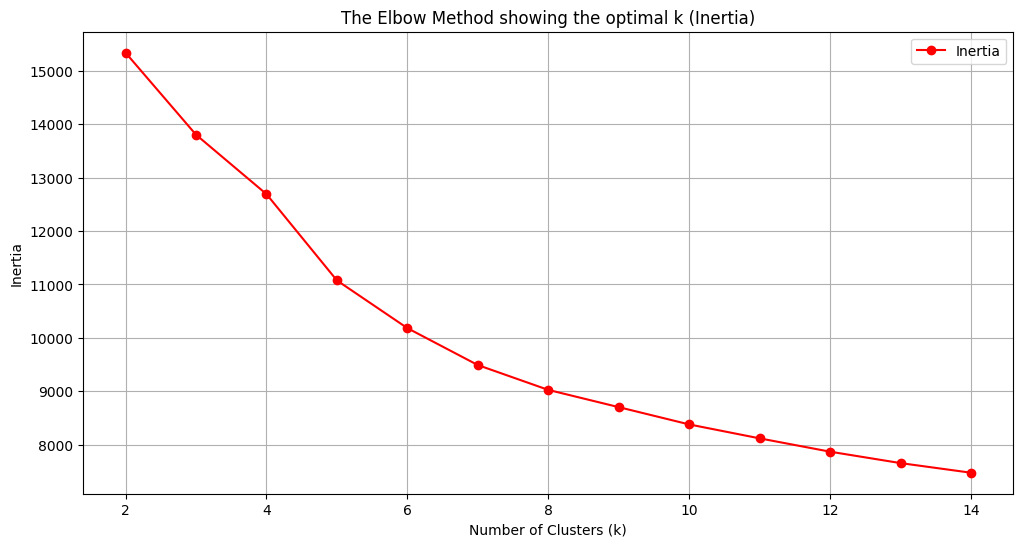

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.spatial.distance import cdist

import pandas as pd

# Range of k values
range_n_clusters = range(2, 15)

distortions = []
inertias = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(scaled_features)
    distortions.append(sum(np.min(cdist(scaled_features, kmeans.cluster_centers_, 'euclidean'), axis=1)) / scaled_features.shape[0])
    inertias.append(kmeans.inertia_)

# Plotting the distortions
plt.figure(figsize=(12, 6))
plt.plot(range_n_clusters, distortions, 'bo-', label='Distortion')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k (Distortion)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the inertias
plt.figure(figsize=(12, 6))
plt.plot(range_n_clusters, inertias, 'ro-', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k (Inertia)')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the average silhouette score is : 0.18266659028049922


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the average silhouette score is : 0.1371541176011039


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the average silhouette score is : 0.14230219601070374


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the average silhouette score is : 0.15267546134199672


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the average silhouette score is : 0.15623427771835502


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the average silhouette score is : 0.1516522008041366


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the average silhouette score is : 0.1493267102058079


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the average silhouette score is : 0.12652926487227537


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, the average silhouette score is : 0.13319680152911886


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 11, the average silhouette score is : 0.12931263305652999


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 12, the average silhouette score is : 0.13061562387672523


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 13, the average silhouette score is : 0.12407953862947246


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 14, the average silhouette score is : 0.12741430458240477


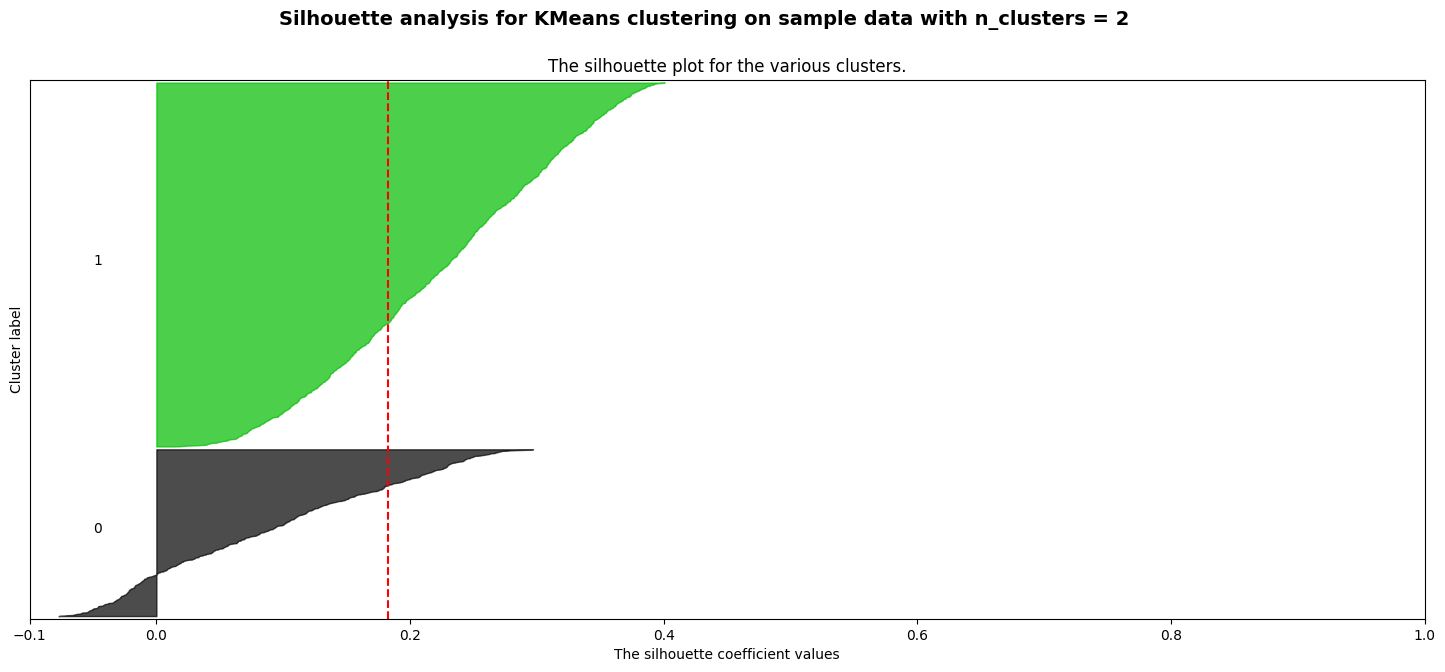

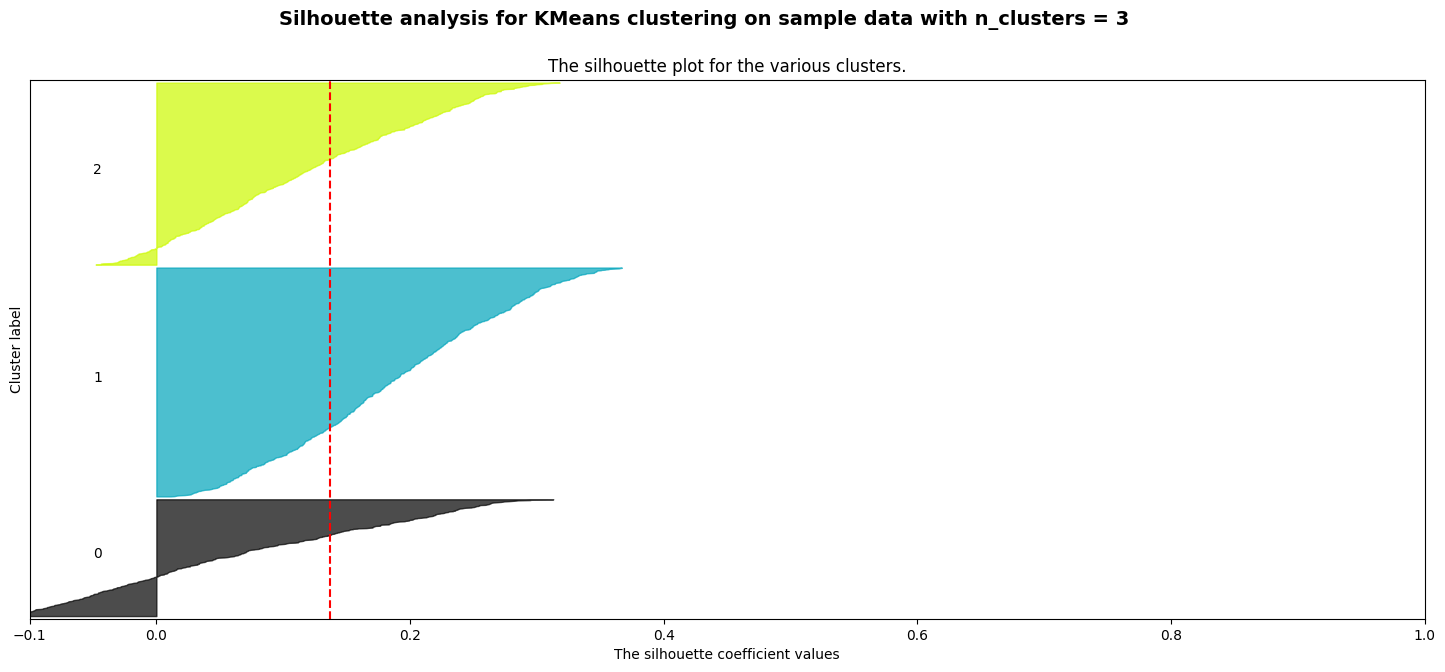

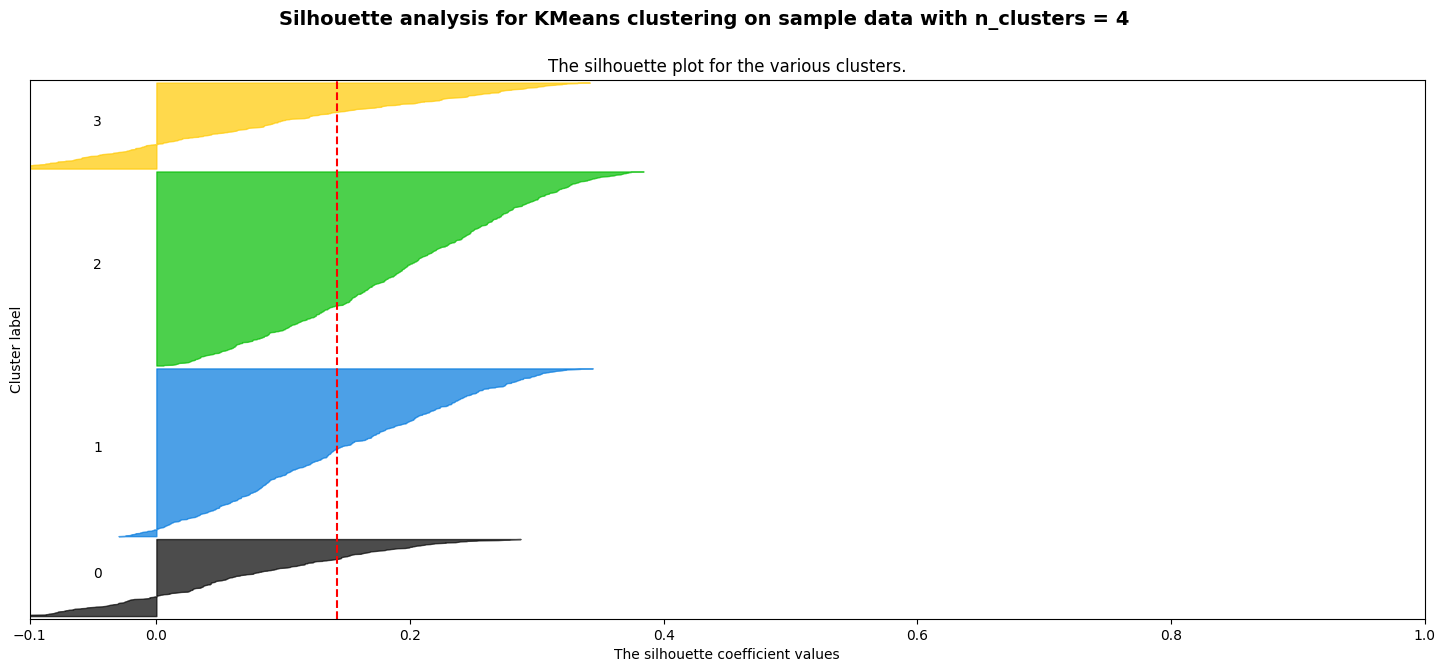

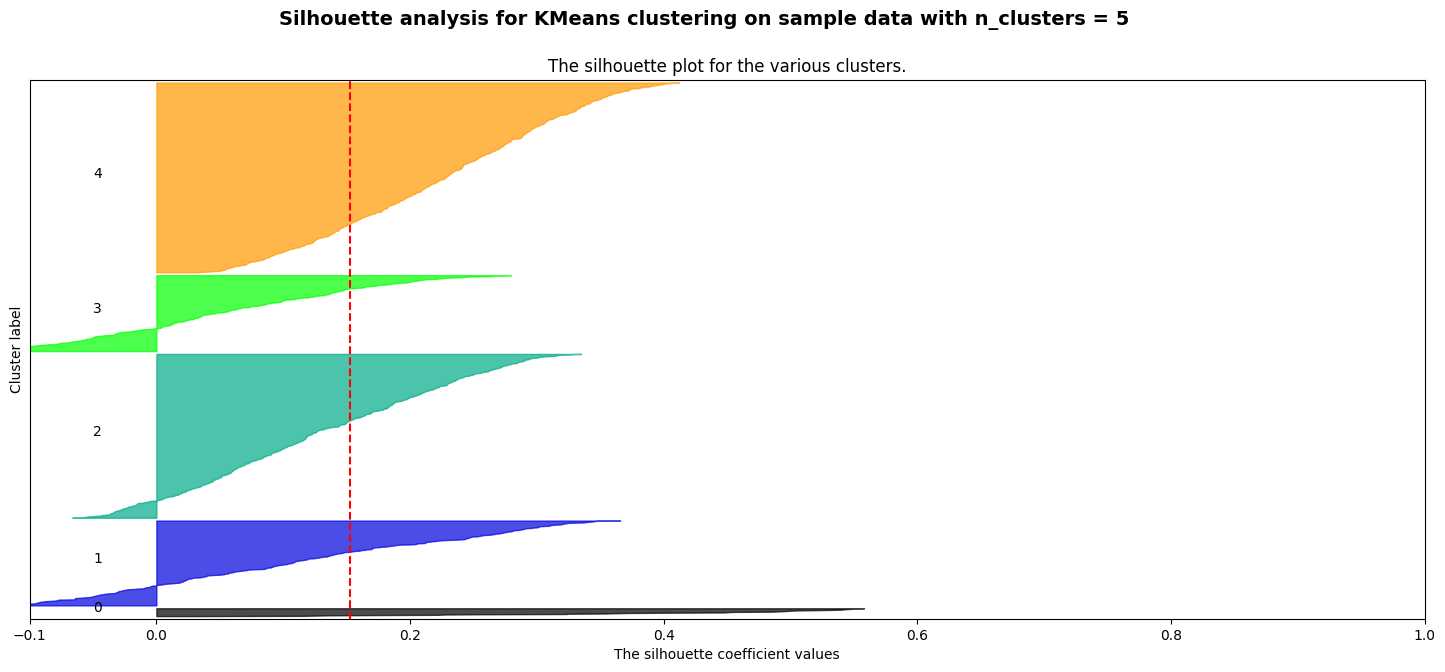

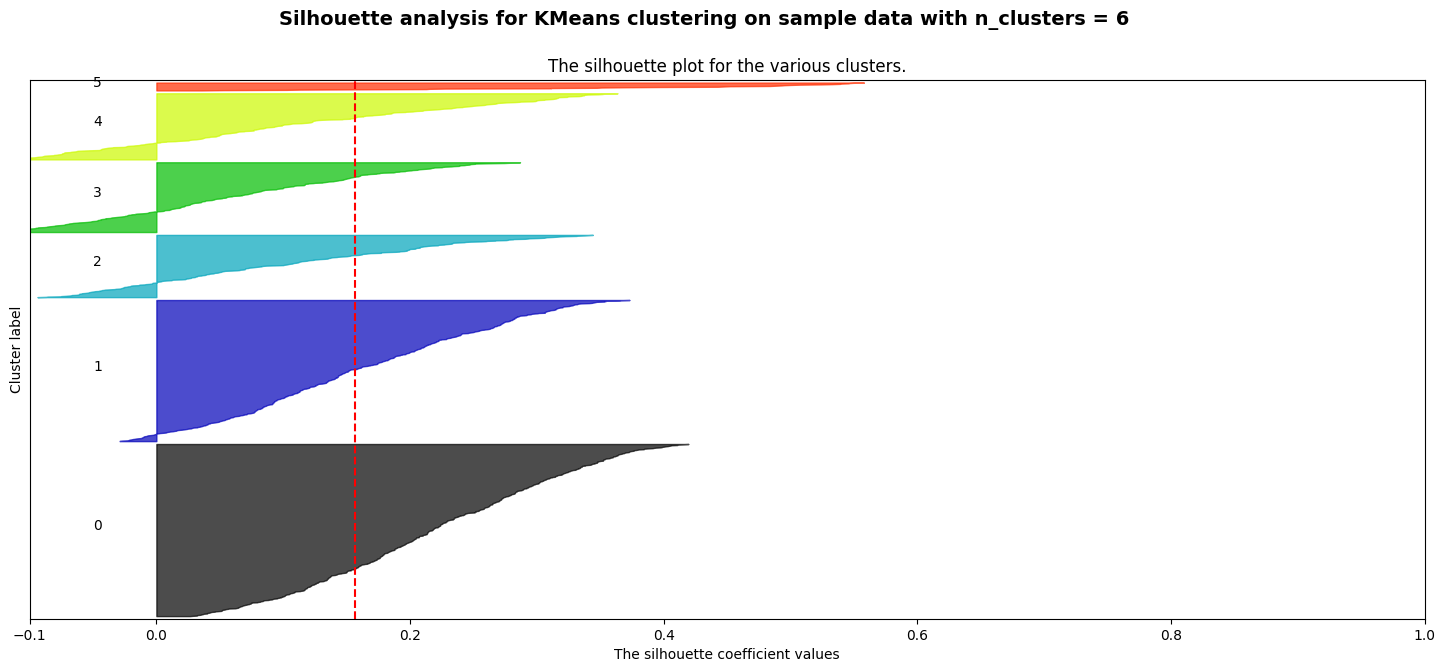

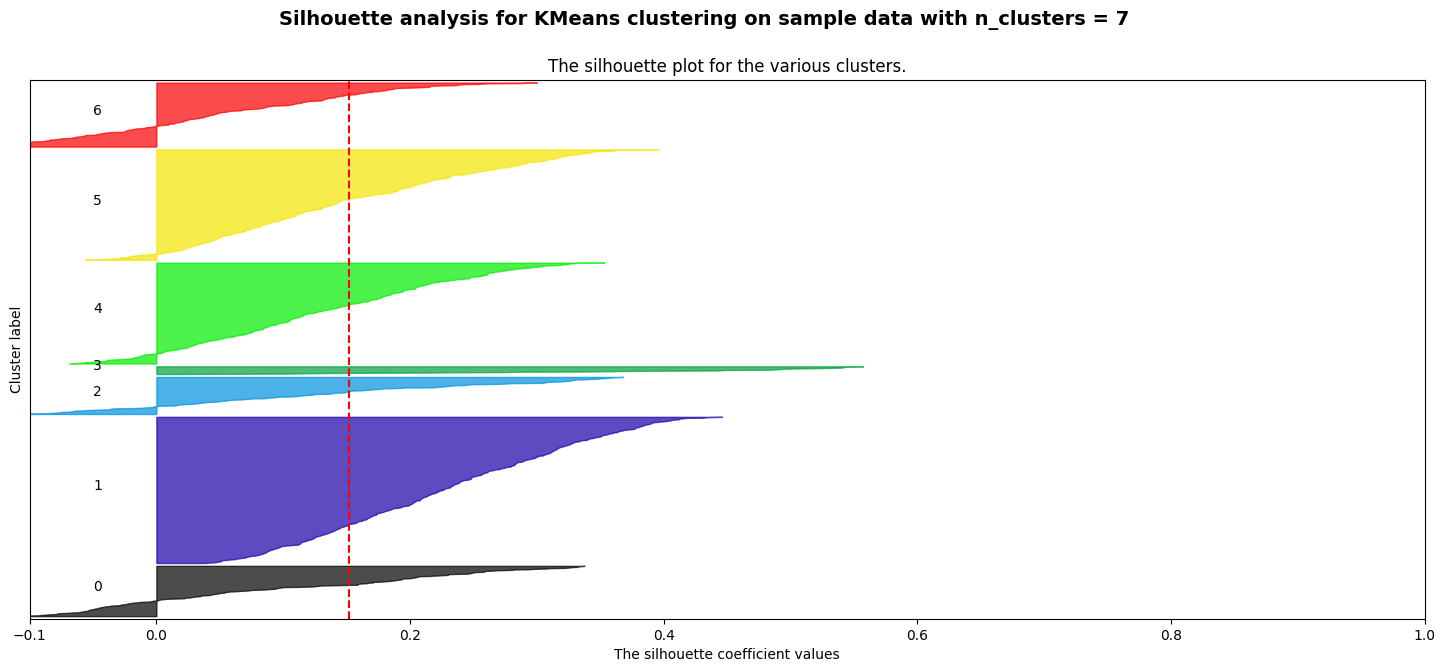

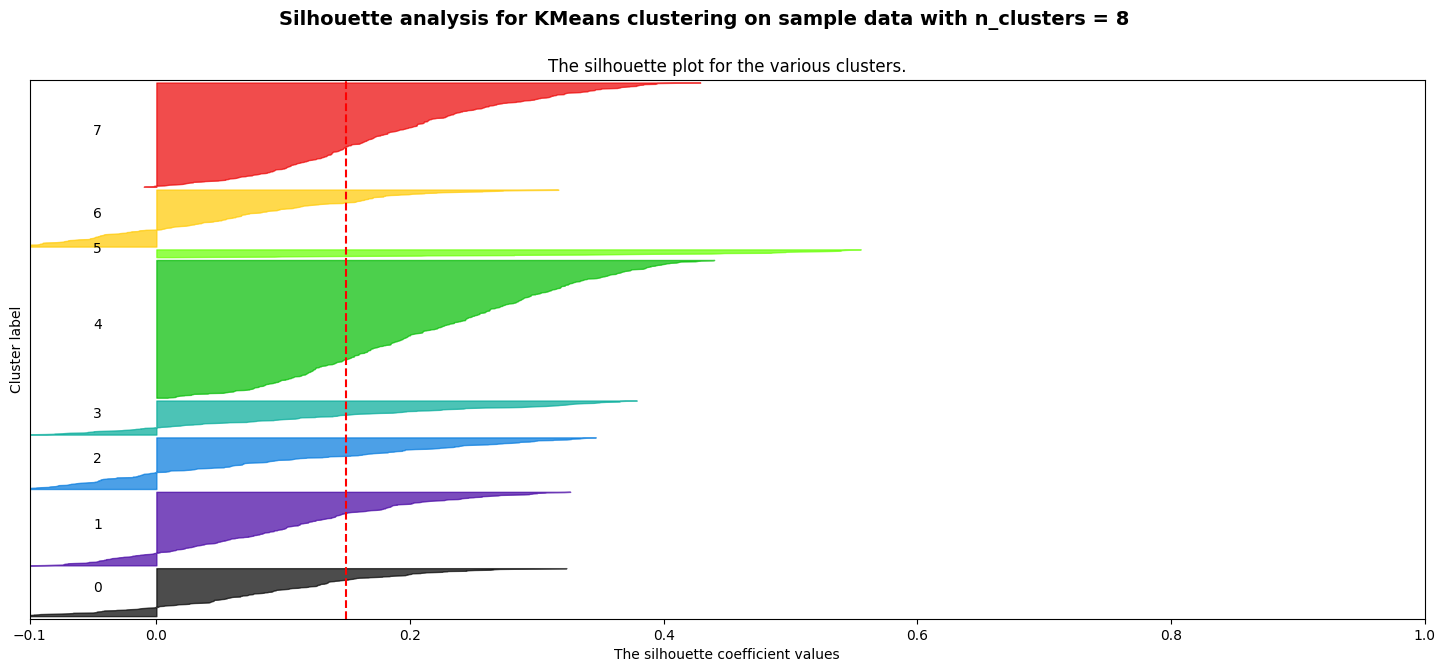

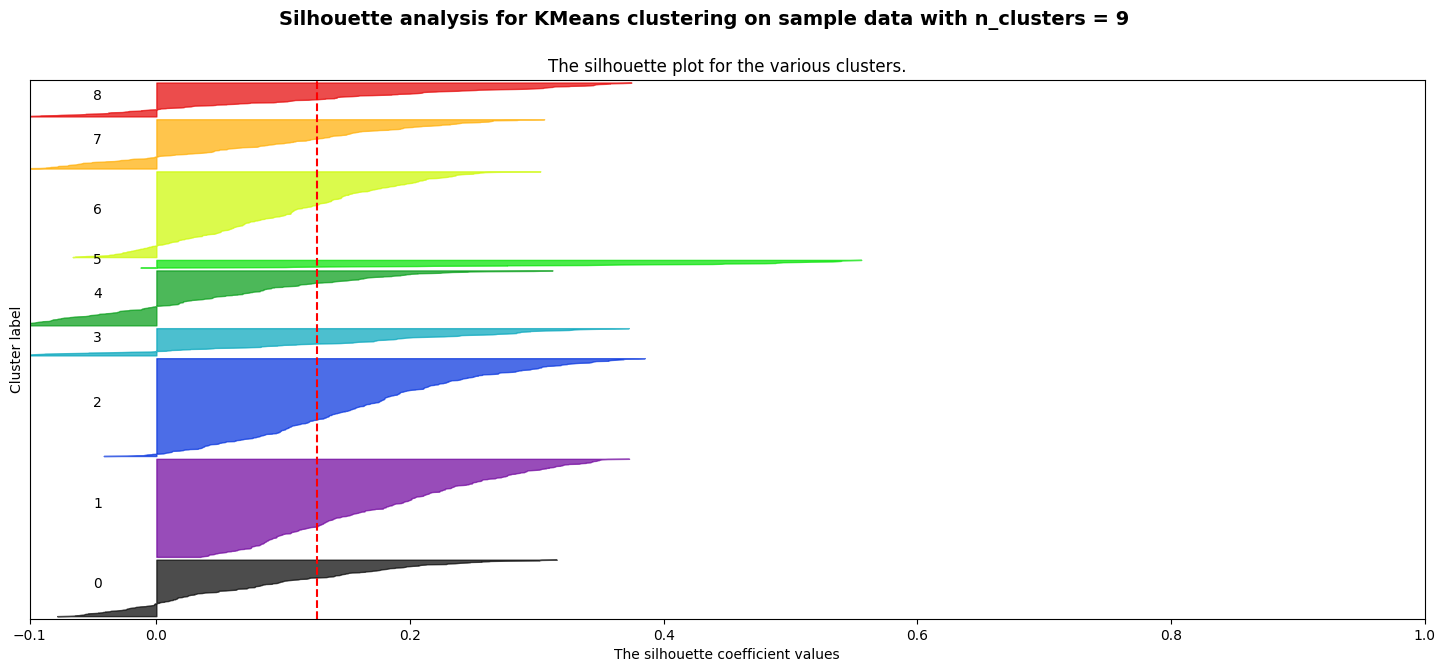

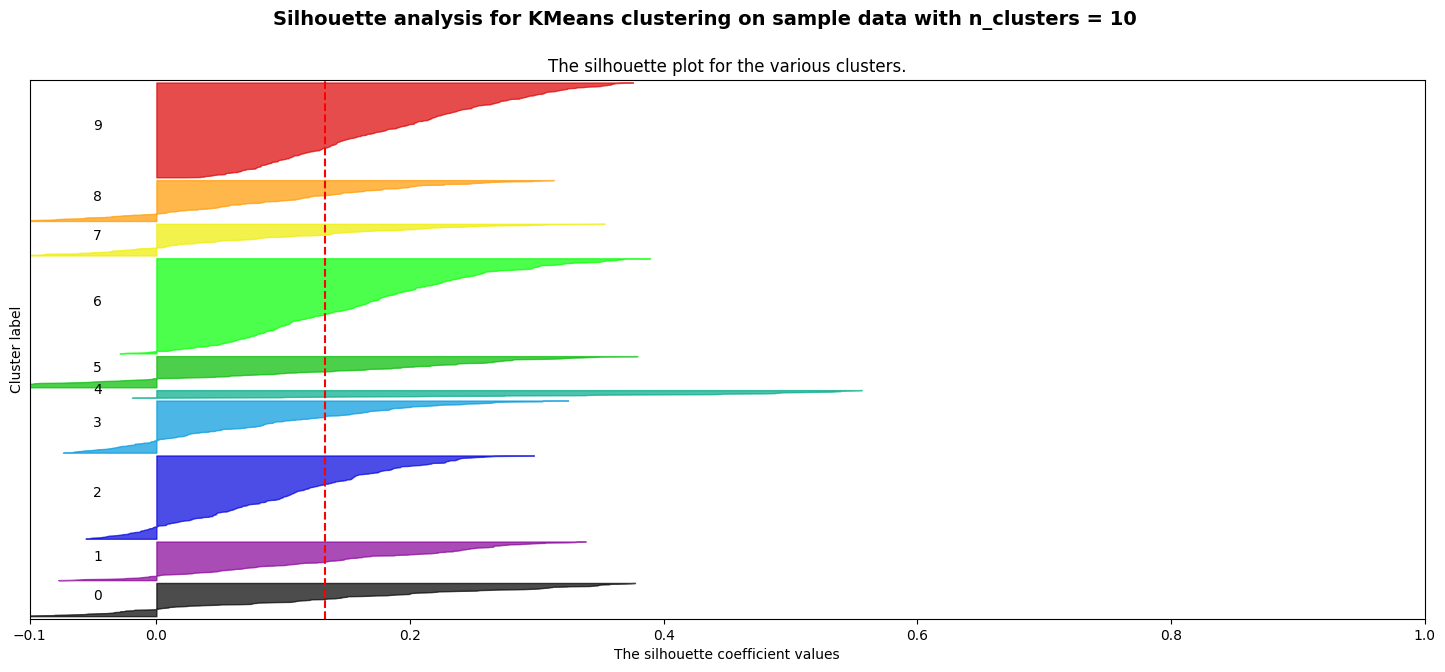

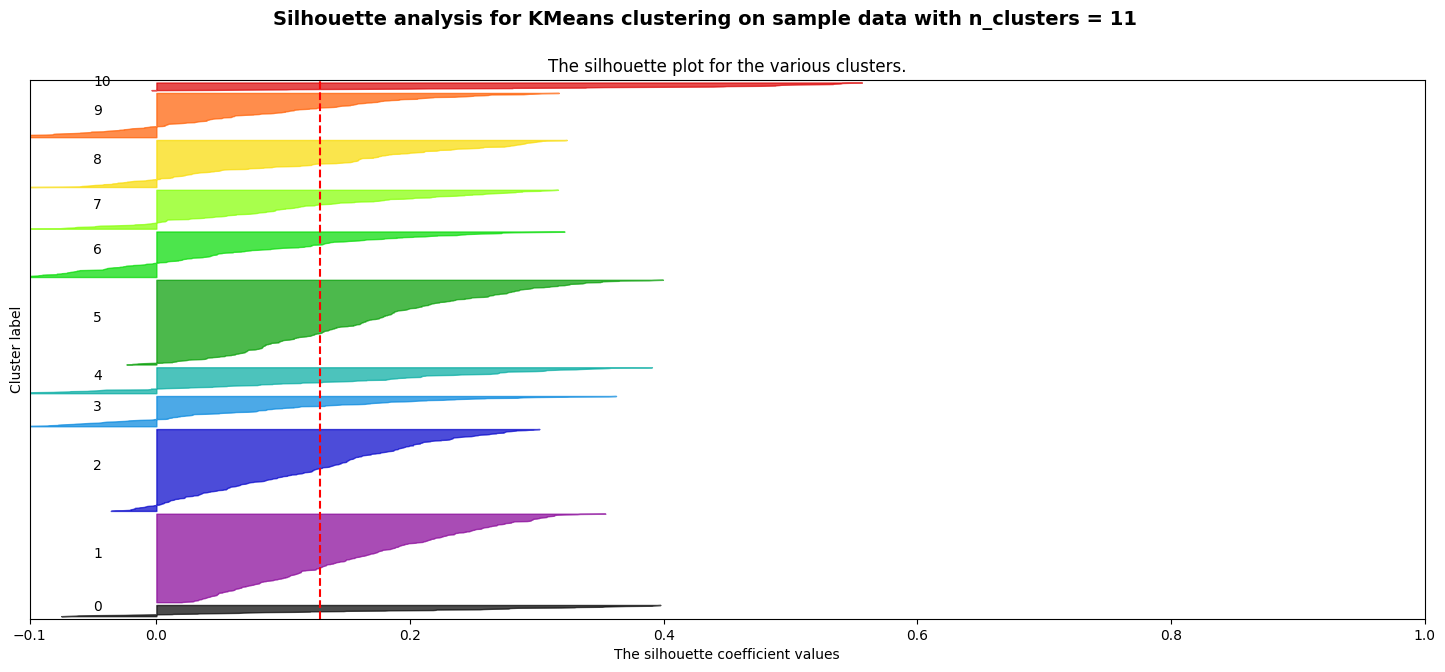

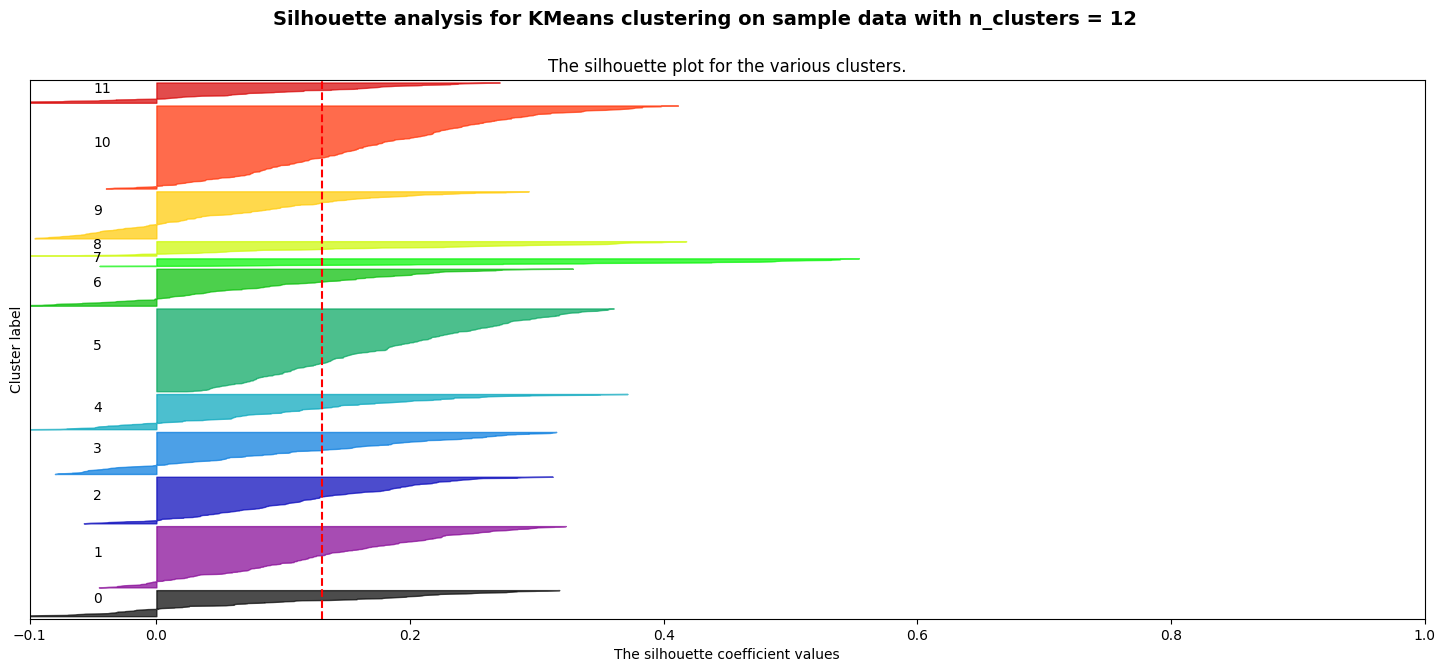

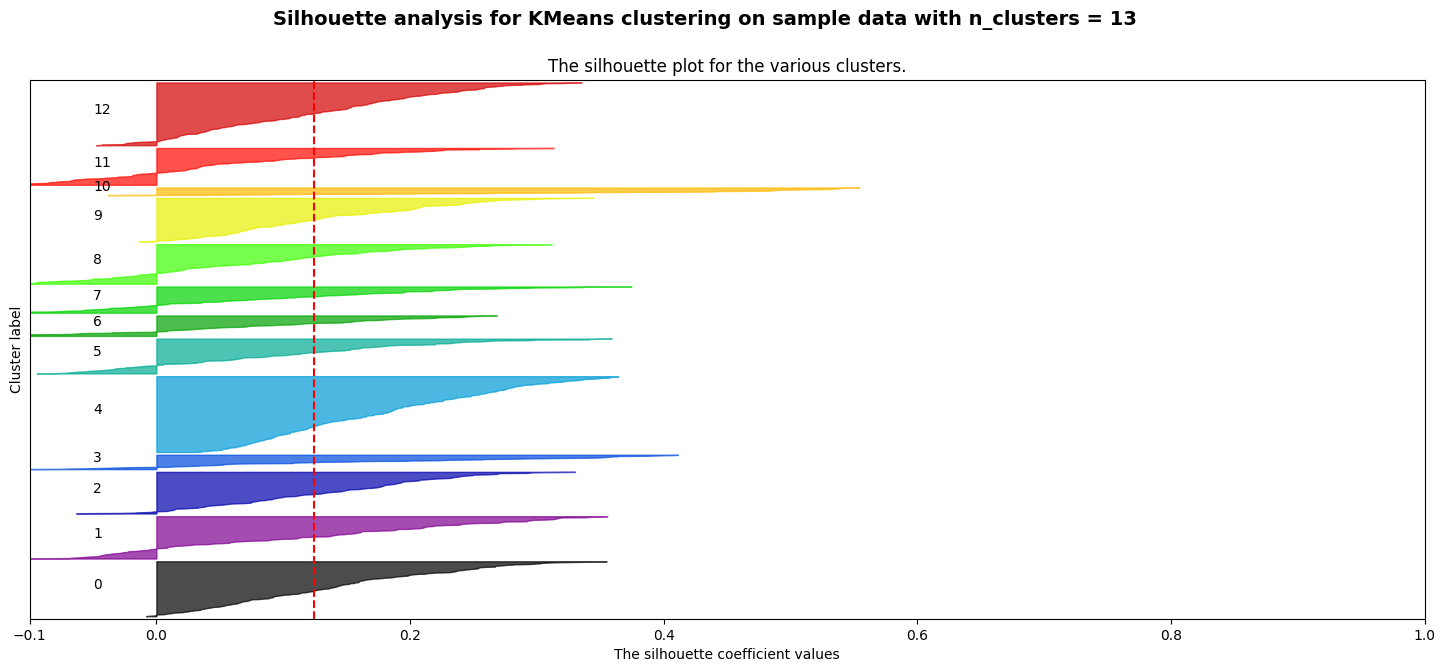

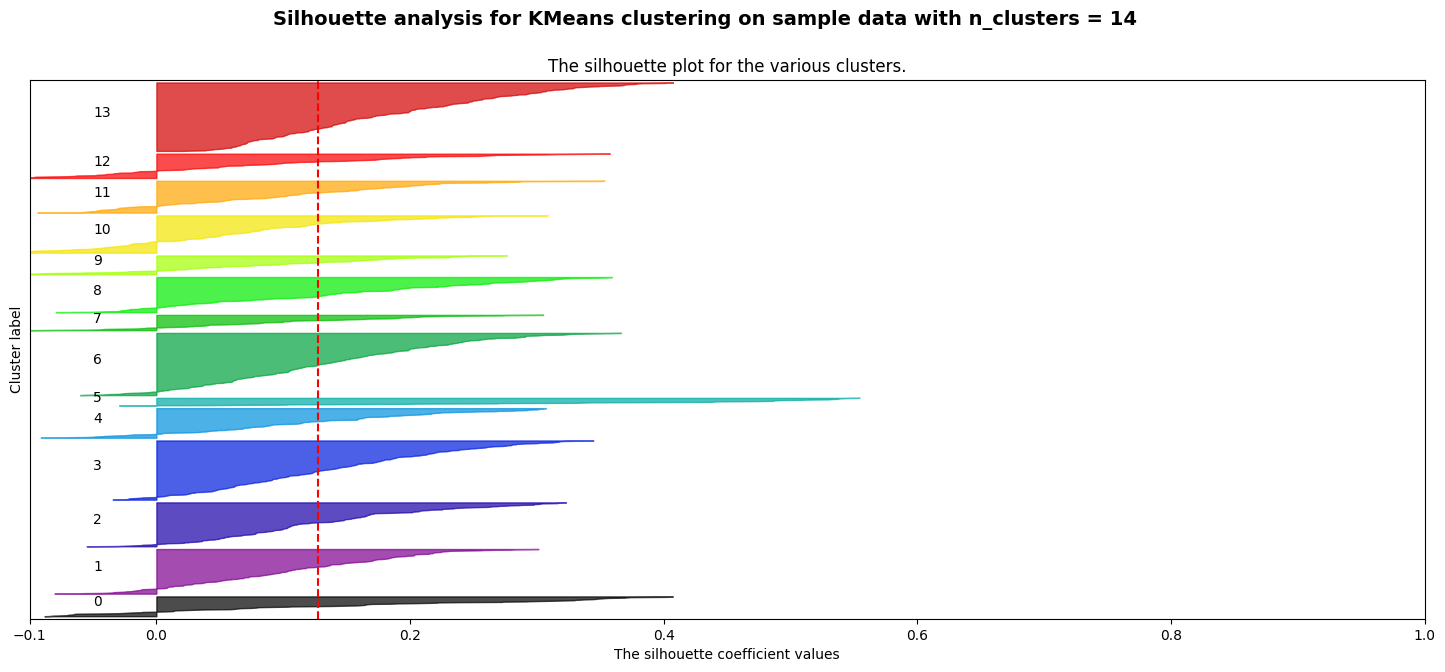

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np


for n_clusters in range_n_clusters:
    # Creating a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters
    ax1.set_ylim([0, len(scaled_features) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_features)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is : {silhouette_avg}")

    # Computes the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_features, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}",
                 fontsize=14, fontweight='bold')

plt.show()


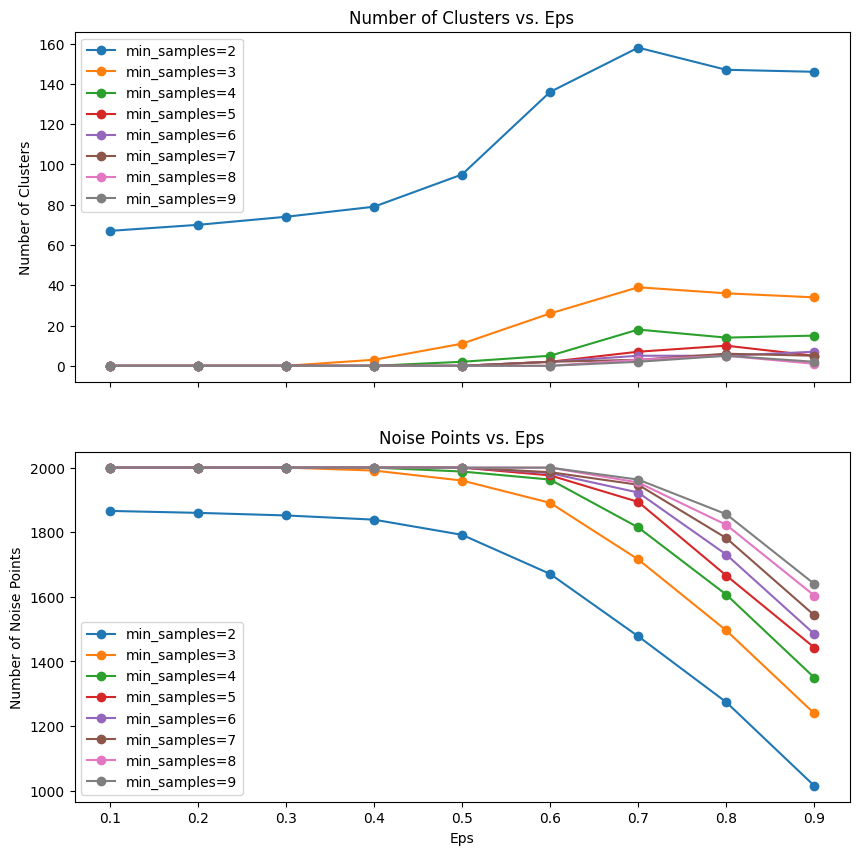

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Range of eps and min_samples I want to explore
eps_values = np.arange(0.1, 1.0, 0.1)
min_samples_values = range(2, 10)

# Storing the results
results = []

# Exploring different combinations of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_features)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        results.append((eps, min_samples, n_clusters, n_noise))

results_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'n_clusters', 'n_noise'])

# Visualizing the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

for min_samples in min_samples_values:
    subset = results_df[results_df['min_samples'] == min_samples]
    ax1.plot(subset['eps'], subset['n_clusters'], marker='o', label=f'min_samples={min_samples}')
    ax2.plot(subset['eps'], subset['n_noise'], marker='o', label=f'min_samples={min_samples}')

ax1.set_ylabel('Number of Clusters')
ax1.set_title('Number of Clusters vs. Eps')
ax1.legend()

ax2.set_xlabel('Eps')
ax2.set_ylabel('Number of Noise Points')
ax2.set_title('Noise Points vs. Eps')
ax2.legend()

plt.show()


In [ ]:
# Performing DBSCAN clustering
dbscan = DBSCAN(eps=0.9, min_samples=2)
dbscan.fit(scaled_features)
data['dbscan_cluster'] = dbscan.labels_

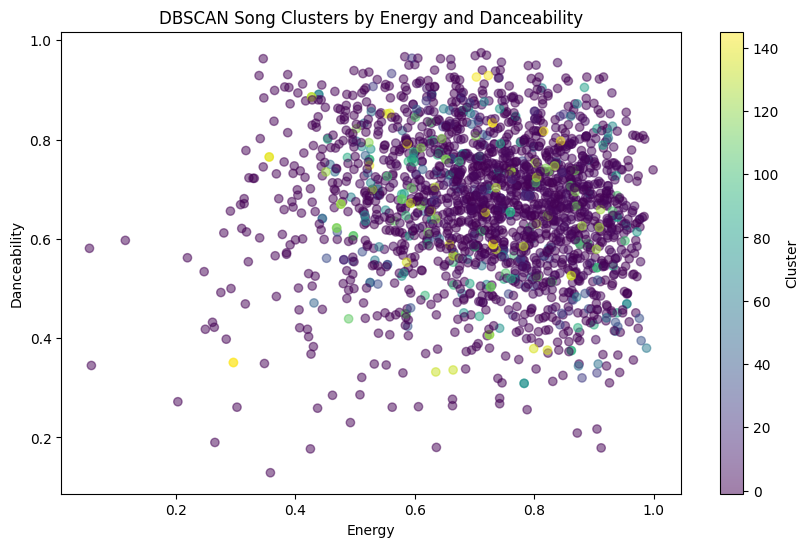

In [ ]:
# Plotting DBSCAN clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['energy'], data['danceability'], c=data['dbscan_cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.title('DBSCAN Song Clusters by Energy and Danceability')
plt.colorbar(label='Cluster')
plt.show()